Dataset: https://www.kaggle.com/datasets/mustafaali96/weight-height

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("heights.csv")

df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [3]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

- total data = 10k
- mean = 66.36
- standard deviation = 3.84

<Axes: xlabel='height', ylabel='Count'>

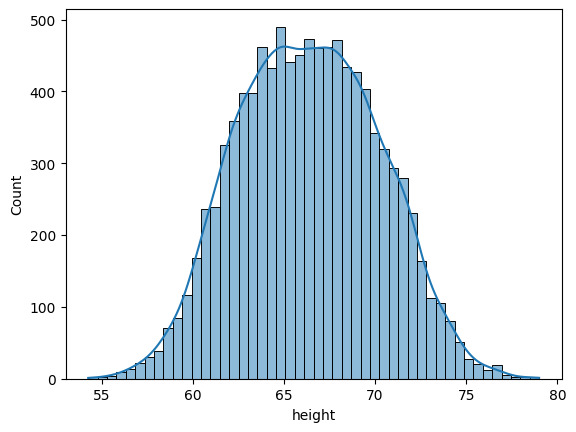

In [4]:
sns.histplot(df.height, kde=True) # Kernel density estimate (KDE)

### Any datapoint that is greater than +3 std (or) -3 std is consider as an outlier.
Screenshot of general guidelines of an outlier:

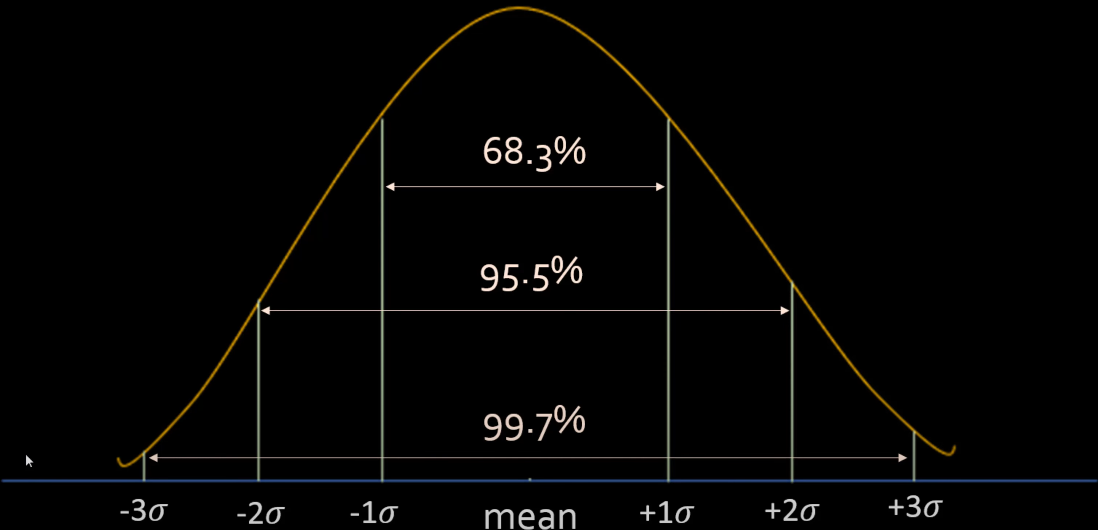

In [6]:
df_mean = df.height.mean()

df_mean

66.367559754866

In [7]:
df_std = df.height.std()

df_std

3.847528120795573

In [9]:
# upto -3 std
df_mean-3*df_std

54.824975392479274

In [10]:
# upto +3 std
df_mean+3*df_std

77.91014411725271

So, our datapoints lies b/w 54.82 to 77.91, and outside of these datapoints lies outliers.

In [11]:
# lets see if their are outliers in our dataset
df[(df.height < 54.82) | (df.height > 77.91)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


The above 7 rows are the outliers in our data

In [14]:
# Lets create a new dataset without outliers
df_no_outliers = df[(df.height > 54.82) & (df.height < 77.91)]

df_no_outliers.shape

(9993, 2)

Now that we removed 7 outliers from the dataset, we have 9993/10000

# Z Score
Z score is the same thing we acheived above but it indicates how many standard deviation away a datapoint is,

for example, if mean is 66.36 (df_mean) and std is 3.84 (df_std) away:

In [16]:
df_mean+3*df_std

77.91014411725271

77.91 is our datapoint that is 3 std away

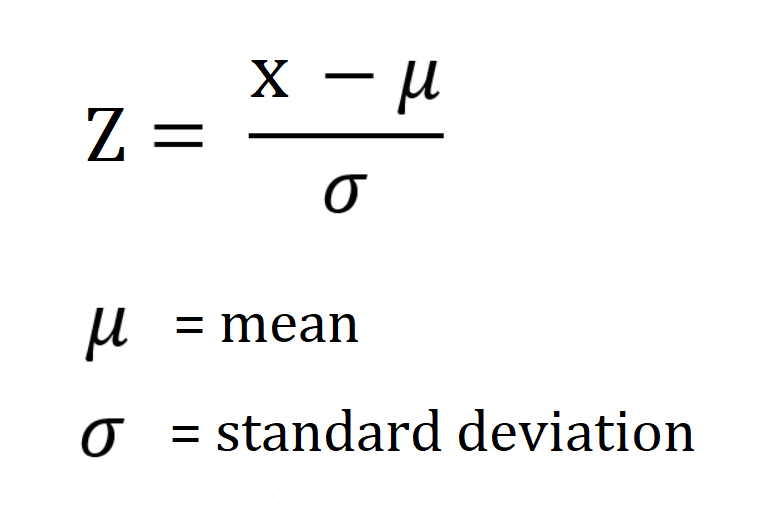

Let's add a new column named 'zscore' and perform the z score formula

In [17]:
df['zscore'] = (df.height - df.height.mean()) / df.height.std()

df.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


lets take an example to simply understand what happend,

In the first row, height value is 73.84 and z score is 1.94. That means 73.84 datapoint is 1.94 std away from the mean.

In [18]:
df.height.mean()

66.367559754866

In [21]:
df.height.std()

3.847528120795573

In [22]:
# lets use formula
(73.84-66.36) / 3.84

1.9479166666666679

See? 73.84 datapoint is 1.94 std away from the mean.

In [23]:
# lets see the outlier datapoints that are outside of +3 std
df[df['zscore']>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [26]:
# lets see the outlier datapoints that are outside of -3 std
df[df['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


### As we can see these are 7 outliers in our data